# Sumário

[Funções de Ativação](#Funções-de-Ativação)

[Funções Auxiliares](#Funções-Auxiliares)

[Funções de Custo](#Funções-de-Custo)

[Inicialização de Pesos](#Inicialização-de-Pesos)

[Regularização](#Regularização)

[Implementação](#Implementação)

[Testes da Implementação](#Testes-da-Implementação)

- [Exemplos do Notebook da Intuição](#Exemplos-do-Notebook-da-Intuição)

- [Regressão](#Regressão)
    - [Regressão Linear Simples](#Regressão-Linear-Simples---Exemplo-do-Perceptron)
    - [Regressão Linear Multivariada](#Regressão-Linear-Multivariada---Exerc%C3%ADcio-de-Regressão-do-Perceptron)
    - [Regressão Quadrática](#Regressão-Quadrática)
    - [Regressão Cúbica](#Regressão-Cúbica)
    - [Regressão Logarítimica](#Regressão-Logar%C3%ADtimica)
    - [Regressão Exponencial](#Regressão-Exponencial)

- [Classificação Binária](#Classificação-Binária)
    - [Porta AND/OR](#Porta-AND/OR)
    - [Porta XOR](#Porta-XOR)
    - [2 Clusters](#2-Clusters)
    - [4 Clusters](#4-Clusters)
    - [Círculos](#C%C3%ADrculos)
    - [Moons](#Moons)
    - [Espiral](#Espiral)
    
- [Classificação Multiclasse](#Classificação-Multiclasse)
    - [3 Clusters Multiclasse](#3-Clusters-Multiclasse)
    - [4 Clusters Multiclasse](#4-Clusters-Multiclasse)
    - [Espiral - 5 Classes](#Espiral---5-Classes)
    - [Make Classification - 4 Classes](#Make-Classification---4-Classes)
    - [Iris Dataset](#Iris-Dataset)

[Referências](#Referências)

# Imports and Configurações

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets.samples_generator import make_blobs, make_circles, make_moons, make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from utils import plots
from utils.samples_generator import make_spiral, make_square, make_cubic, make_exp, make_log10

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

%matplotlib inline

## Exemplos do Notebook da Intuição

In [40]:
x = np.array([[0.05, 0.10]])
y = np.array([[0.01, 0.99]])

D_in, D_out = x.shape[1], y.shape[1]

w1 = np.array([[0.15, 0.20], [0.25, 0.30]])
b1 = np.array([0.35, 0.35])
w2 = np.array([[0.40, 0.45], [0.50, 0.55]])
b2 = np.array([0.60, 0.60])

model = Sequential()
model.add(Dense(units=2, activation='sigmoid', input_shape=(D_in,), weights=[w1, b1]))
model.add(Dense(units=2, activation='sigmoid'))

model.layers[1].set_weights([w2, b2])
model.compile(optimizer=SGD(lr=0.5), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=1, verbose=1)

Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3037


### Exemplo 2

In [52]:
x = np.array([[0.1, 0.2, 0.7]])
y = np.array([[1, 0, 0]])
D_in, D_out = x.shape[1], y.shape[1]

w1 = np.array([[0.1, 0.2, 0.3], [0.3, 0.2, 0.7], [0.4, 0.3, 0.9]])
b1 = np.ones(3)
w2 = np.array([[0.2, 0.3, 0.5], [0.3, 0.5, 0.7], [0.6, 0.4, 0.8]])
b2 = np.ones(3)
w3 = np.array([[0.1, 0.4, 0.8], [0.3, 0.7, 0.2], [0.5, 0.2, 0.9]])
b3 = np.ones(3)

model = Sequential()
model.add(Dense(units=3, activation='relu', input_shape=(D_in,), weights=[w1, b1]))
model.add(Dense(units=3, activation='sigmoid'))
model.add(Dense(units=D_out, activation=None))

model.layers[1].set_weights([w2, b2])
model.layers[2].set_weights([w3, b3])

model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=300)

Epoch 1/300
1/1 [==============================] - 0s - loss: 1.3101
Epoch 2/300
1/1 [==============================] - 0s - loss: 1.3029
Epoch 3/300
1/1 [==============================] - 0s - loss: 1.2957
Epoch 4/300
1/1 [==============================] - 0s - loss: 1.2887
Epoch 5/300
1/1 [==============================] - 0s - loss: 1.2818
Epoch 6/300
1/1 [==============================] - 0s - loss: 1.2751
Epoch 7/300
1/1 [==============================] - 0s - loss: 1.2684
Epoch 8/300
1/1 [==============================] - 0s - loss: 1.2618
Epoch 9/300
1/1 [==============================] - 0s - loss: 1.2553
Epoch 10/300
1/1 [==============================] - 0s - loss: 1.2489
Epoch 11/300
1/1 [==============================] - 0s - loss: 1.2426
Epoch 12/300
1/1 [==============================] - 0s - loss: 1.2364
Epoch 13/300
1/1 [==============================] - 0s - loss: 1.2303
Epoch 14/300
1/1 [==============================] - 0s - loss: 1.2242
Epoch 15/300
1/1 [===========

1/1 [==============================] - 0s - loss: 0.5213
Epoch 233/300
1/1 [==============================] - 0s - loss: 0.5188
Epoch 234/300
1/1 [==============================] - 0s - loss: 0.5163
Epoch 235/300
1/1 [==============================] - 0s - loss: 0.5139
Epoch 236/300
1/1 [==============================] - 0s - loss: 0.5114
Epoch 237/300
1/1 [==============================] - 0s - loss: 0.5090
Epoch 238/300
1/1 [==============================] - 0s - loss: 0.5065
Epoch 239/300
1/1 [==============================] - 0s - loss: 0.5040
Epoch 240/300
1/1 [==============================] - 0s - loss: 0.5016
Epoch 241/300
1/1 [==============================] - 0s - loss: 0.4991
Epoch 242/300
1/1 [==============================] - 0s - loss: 0.4966
Epoch 243/300
1/1 [==============================] - 0s - loss: 0.4941
Epoch 244/300
1/1 [==============================] - 0s - loss: 0.4917
Epoch 245/300
1/1 [==============================] - 0s - loss: 0.4892
Epoch 246/300
1/1 [=

## Regressão

### Regressão Linear Simples - Exemplo do Perceptron

In [73]:
data = np.loadtxt('data/medidas.csv', delimiter=',', skiprows=1)
print(data.shape)

x, y = data[:,0].reshape(-1,1), data[:,1].reshape(-1,1)
print(x.shape, y.shape)

(100, 2)
(100, 1) (100, 1)


In [74]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0


data_loss: 0.261339740753
[array([[ 33.53989029]], dtype=float32), array([ 74.77069855], dtype=float32)]


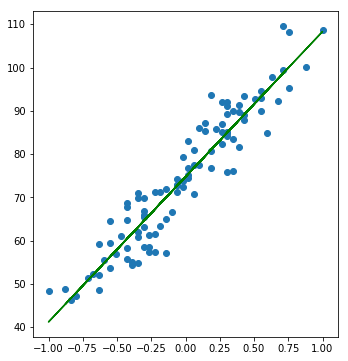

In [75]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=D_out, activation=None, input_shape=(D_in,)))

model.compile(optimizer=SGD(lr=1e-2), loss='mse')

model.fit(x, y, epochs=1000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])
print(model.layers[0].get_weights())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')

### Regressão Linear Multivariada - Exercício de Regressão do Perceptron

In [76]:
data = np.loadtxt('data/notas.csv', delimiter=',', skiprows=1)
print(data.shape)

x, y = data[:,:-1], data[:,-1].reshape(-1,1)
print(x.shape, y.shape)

(25, 4)
(25, 3) (25, 1)


In [77]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1. -1. -1.] [ 1.  1.  1.]


In [78]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=D_out, activation=None, input_shape=(D_in,)))

model.compile(optimizer=SGD(lr=1e-1), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=2000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])
print(model.layers[0].get_weights())

data_loss: 0.229512500763
[array([[  8.72361851],
       [ 14.10354137],
       [ 26.26626205]], dtype=float32), array([ 150.65153503], dtype=float32)]


### Regressão Quadrática

In [86]:
x, y = make_square(n_samples=100, x_min=-10, x_max=10, a=1, b=1, c=1, noise=10)

print(x.shape, y.shape)

(100, 1) (100, 1)


In [87]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [ 1.]


data_loss: 0.280423355103


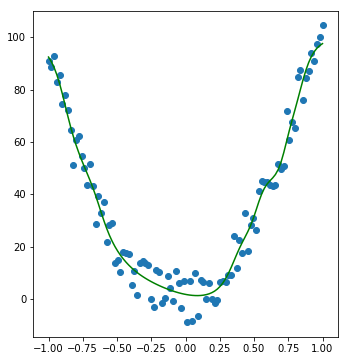

In [88]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=10, activation='tanh', input_shape=(D_in,)))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=D_out, activation=None))

model.compile(optimizer=SGD(lr=1e-3), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=10000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')

### Regressão Cúbica

In [89]:
x, y = make_cubic(n_samples=100, x_min=-4, x_max=4, a=1, b=0, c=-10, d=0, noise=3)

print(x.shape, y.shape)

(100, 1) (100, 1)


In [90]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [ 1.]


data_loss: 0.0305207920074


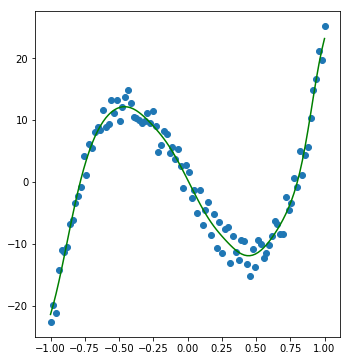

In [93]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=10, activation='tanh', input_shape=(D_in,)))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=D_out, activation=None))

model.compile(optimizer=SGD(lr=1e-3), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=10000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')

### Regressão Logarítimica

In [94]:
x, y = make_log10(n_samples=100, x_min=1, x_max=100, noise=0.3)

print(x.shape, y.shape)

(100, 1) (100, 1)


In [95]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [ 1.]


data_loss: 0.00087524086237


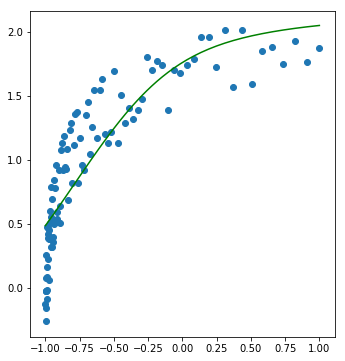

In [98]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=10, activation='tanh', input_shape=(D_in,)))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=D_out, activation=None))

model.compile(optimizer=SGD(lr=1e-3), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=10000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')

### Regressão Exponencial

In [99]:
x, y = make_exp(n_samples=100, x_min=0, x_max=5, noise=10)

print(x.shape, y.shape)

(100, 1) (100, 1)


In [100]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [ 1.]


data_loss: 0.282177829742


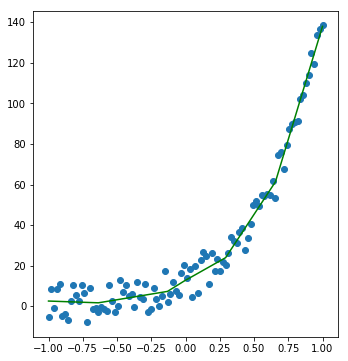

In [101]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(D_in,)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=D_out, activation=None))

model.compile(optimizer=SGD(lr=1e-3), loss='mse')

model.fit(x, y, batch_size=x.shape[0], epochs=10000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')

## Classificação Binária

### Porta AND/OR

In [102]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1]).reshape(-1, 1)

print(x.shape, y.shape)

(4, 2) (4, 1)


data_loss: 0.000859928491991
[array([[ 10.6782341],
       [ 10.6782341]], dtype=float32), array([-16.18642616], dtype=float32)]
Predições:
[[  9.33951654e-08]
 [  4.03706497e-03]
 [  4.03706497e-03]
 [  9.94347751e-01]]
Acurácia: 100.00%


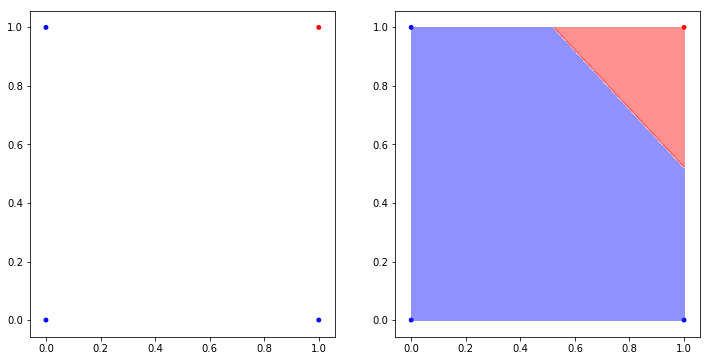

In [104]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=D_out, activation='sigmoid', input_shape=(D_in,)))

model.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)

print('data_loss:', model.evaluate(x, y, batch_size=x.shape[0], verbose=0)/x.shape[0])

print(model.layers[0].get_weights())

y_pred = model.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### Porta XOR

In [2]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

print(x.shape, y.shape)

(4, 2) (4, 1)


Predições:
[[ 0.00458385]
 [ 0.99662328]
 [ 0.99661922]
 [ 0.00481427]]
Acurácia: 100.00%


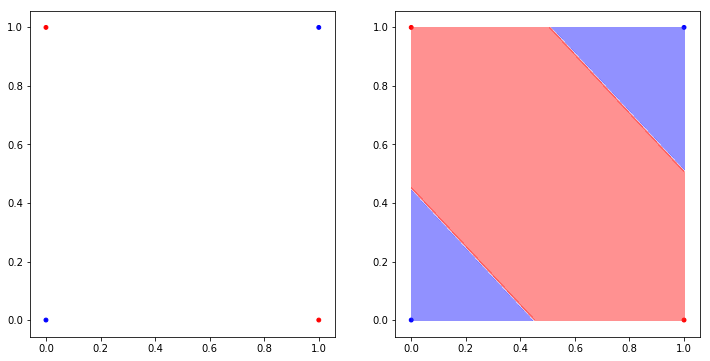

In [4]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=2, activation='sigmoid', input_shape=(D_in,)))
model.add(Dense(units=D_out, activation='sigmoid'))

model.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)

y_pred = model.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### 2 Clusters

In [5]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(100, 2) (100, 1)


Acurácia: 100.00%


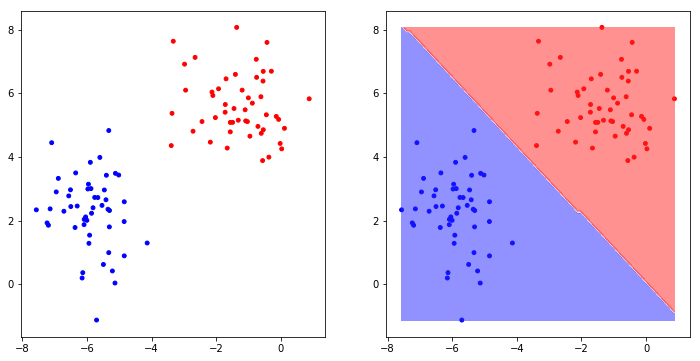

In [6]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=D_out, activation='sigmoid', input_shape=(D_in,)))

model.compile(optimizer=SGD(lr=1e-2), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)

y_pred = model.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### 4 Clusters

In [7]:
x, y = make_blobs(n_samples=500, n_features=2, cluster_std=0.9, centers=[(-3, -3), (3, 3), (-3, 3), (3, -3)], random_state=1234)
y = y.reshape(-1, 1)
y = np.where(y >= 2, 1, 0)

print(x.shape, y.shape)

(500, 2) (500, 1)


Acurácia: 99.80%


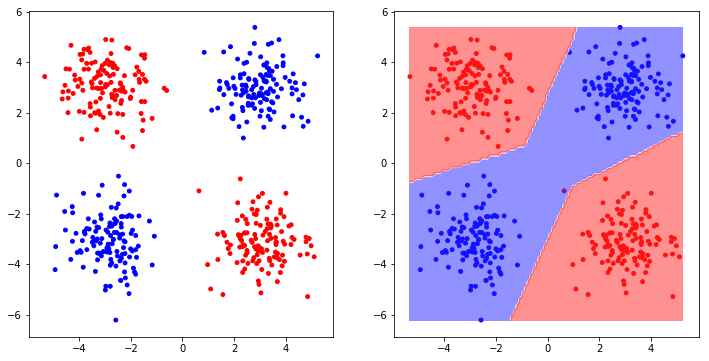

In [10]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=(D_in,)))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=D_out, activation='sigmoid'))

model.compile(optimizer=SGD(lr=1e-2), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)

y_pred = model.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### Círculos

In [11]:
x, y = make_circles(n_samples=500, noise=0.1, factor=0.4, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(500, 2) (500, 1)


Acurácia: 100.00%


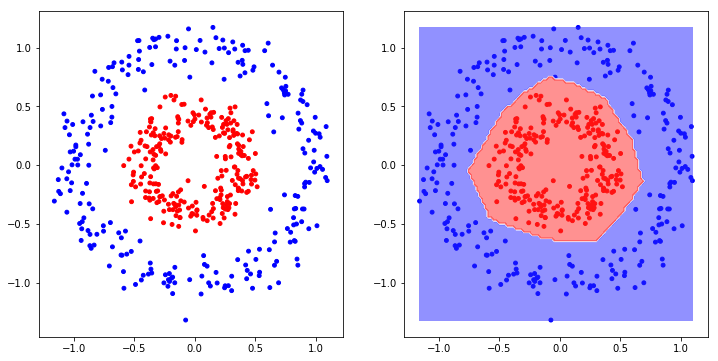

In [13]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=5, activation='relu', input_shape=(D_in,)))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=D_out, activation='sigmoid'))

model.compile(optimizer=SGD(lr=1e-2), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=10000, verbose=0)

y_pred = model.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### Moons

In [14]:
x, y = make_moons(200, noise=0.20)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(200, 2) (200, 1)


Acurácia: 95.50%


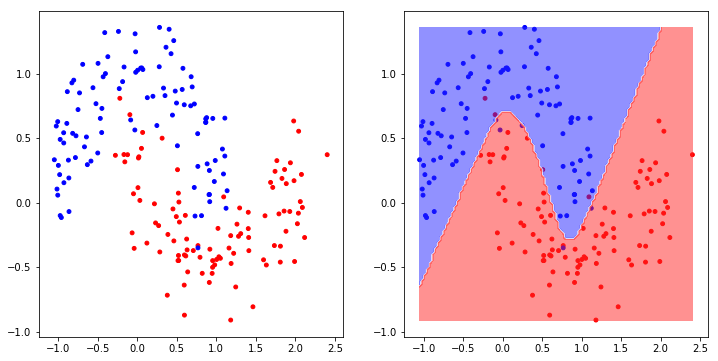

In [18]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=3, activation='tanh', input_shape=(D_in,)))
model.add(Dense(units=D_out, activation='sigmoid'))

model.compile(optimizer=SGD(lr=1e-1), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=20000, verbose=0)

y_pred = model.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### Espiral

In [19]:
x, y = make_spiral(n_samples=100, n_class=2, radius=5, laps=1.75)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(200, 2) (200, 1)


Acurácia: 99.50%


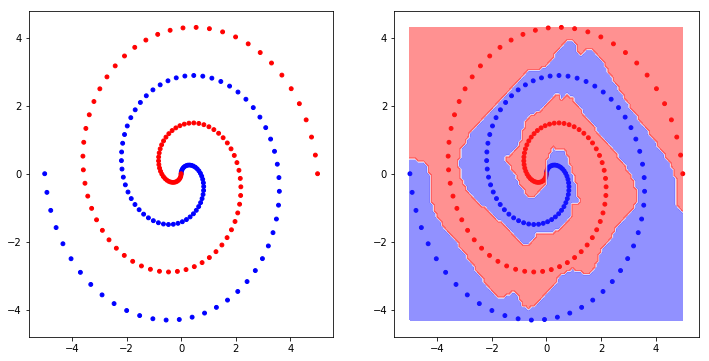

In [27]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(units=8, activation='tanh', input_shape=(D_in,)))
model.add(Dense(units=20, activation='tanh'))
model.add(Dense(units=D_out, activation='sigmoid'))

model.compile(optimizer=SGD(lr=1e-1), loss='binary_crossentropy')

model.fit(x, y, batch_size=x.shape[0], epochs=20000, verbose=0)

y_pred = model.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

## Classificação Multiclasse

### 3 Clusters Multiclasse

In [49]:
x, y = make_blobs(n_samples=300, n_features=2, centers=[(0, -3), (-3, 3), (3, 3)], random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(300, 2) (300, 1)


In [50]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::60])

[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]


epoch:    0/10000 data_loss:0.01446398 reg_loss:0.44334769 cost:0.45781168
epoch: 1000/10000 data_loss:0.00059985 reg_loss:0.18369347 cost:0.18429332
epoch: 2000/10000 data_loss:0.00042326 reg_loss:0.17523225 cost:0.17565551
epoch: 3000/10000 data_loss:0.00036324 reg_loss:0.17328157 cost:0.17364482
epoch: 4000/10000 data_loss:0.00033183 reg_loss:0.17280331 cost:0.17313513
epoch: 5000/10000 data_loss:0.00031188 reg_loss:0.17276168 cost:0.17307356
epoch: 6000/10000 data_loss:0.00029867 reg_loss:0.17270317 cost:0.17300184
epoch: 7000/10000 data_loss:0.00028976 reg_loss:0.17246934 cost:0.17275910
epoch: 8000/10000 data_loss:0.00028207 reg_loss:0.17260966 cost:0.17289173
epoch: 9000/10000 data_loss:0.00027737 reg_loss:0.17228944 cost:0.17256681
epoch: 10000/10000 data_loss:0.00027216 reg_loss:0.17247844 cost:0.17275060
[[ 0.90307088  0.17997111]
 [ 0.10446491 -0.84133696]]
[[-0.14016292  0.77368013]
 [-0.61087457 -0.5057874 ]
 [ 0.75097265 -0.26778016]]
Acurácia: 100.00%


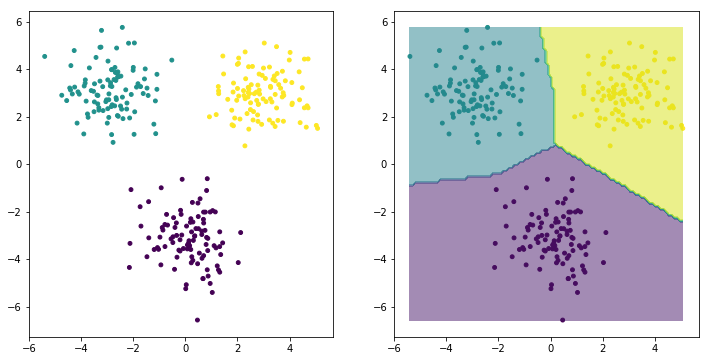

In [66]:
D_in, D_out = x.shape[1], y_onehot.shape[1]

nn = NeuralNetwork(cost_func=softmax_neg_log_likelihood, learning_rate=1e-2, reg_func=l2_regularization, reg_strength=0.1)
nn.layers.append(Layer(input_dim=D_in, output_dim=2, activation=relu))
nn.layers.append(Layer(input_dim=2, output_dim=D_out, activation=linear))

nn.fit(x, y_onehot, epochs=10000, verbose=1000)

for layer in nn.layers:
    print(layer.weights)
    
y_pred = np.argmax(nn.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=nn)

### 4 Clusters Multiclasse

In [67]:
x, y = make_blobs(n_samples=400, n_features=2, centers=[(-3, 0), (3, 0), (0, 3), (0, -3)], random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(400, 2) (400, 1)


In [68]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::70])

[[ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]]


epoch:    0/10000 data_loss:0.00727110 reg_loss:0.00000000 cost:0.00727110
epoch: 1000/10000 data_loss:0.00041770 reg_loss:0.00000000 cost:0.00041770
epoch: 2000/10000 data_loss:0.00032479 reg_loss:0.00000000 cost:0.00032479
epoch: 3000/10000 data_loss:0.00029065 reg_loss:0.00000000 cost:0.00029065
epoch: 4000/10000 data_loss:0.00027140 reg_loss:0.00000000 cost:0.00027140
epoch: 5000/10000 data_loss:0.00025863 reg_loss:0.00000000 cost:0.00025863
epoch: 6000/10000 data_loss:0.00024947 reg_loss:0.00000000 cost:0.00024947
epoch: 7000/10000 data_loss:0.00024249 reg_loss:0.00000000 cost:0.00024249
epoch: 8000/10000 data_loss:0.00023697 reg_loss:0.00000000 cost:0.00023697
epoch: 9000/10000 data_loss:0.00023249 reg_loss:0.00000000 cost:0.00023249
epoch: 10000/10000 data_loss:0.00022874 reg_loss:0.00000000 cost:0.00022874
Acurácia: 96.75%


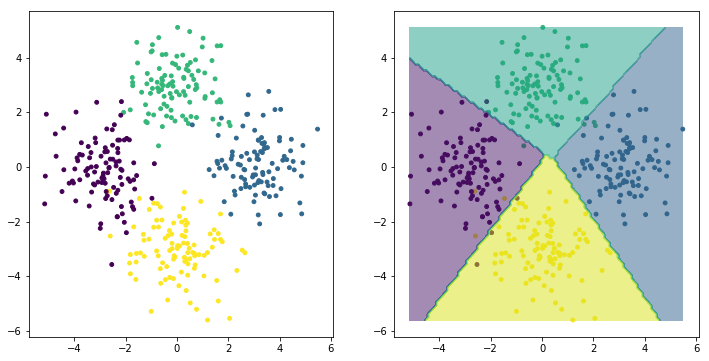

In [69]:
D_in, D_out = x.shape[1], y_onehot.shape[1]

nn = NeuralNetwork(cost_func=softmax_neg_log_likelihood, learning_rate=1e-2)
nn.layers.append(Layer(input_dim=D_in, output_dim=3, activation=relu))
nn.layers.append(Layer(input_dim=3, output_dim=D_out, activation=linear))

nn.fit(x, y_onehot, epochs=10000, verbose=1000)

y_pred = np.argmax(nn.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=nn)

### Espiral - 5 Classes

In [70]:
x, y = make_spiral(n_samples=100, n_class=5, radius=1, laps=0.5)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(500, 2) (500, 1)


In [71]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::100])

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


epoch:    0/10000 data_loss:0.05090230 reg_loss:0.00000000 cost:0.05090230
epoch: 1000/10000 data_loss:0.00060717 reg_loss:0.00000000 cost:0.00060717
epoch: 2000/10000 data_loss:0.00030377 reg_loss:0.00000000 cost:0.00030377
epoch: 3000/10000 data_loss:0.00018976 reg_loss:0.00000000 cost:0.00018976
epoch: 4000/10000 data_loss:0.00014089 reg_loss:0.00000000 cost:0.00014089
epoch: 5000/10000 data_loss:0.00011646 reg_loss:0.00000000 cost:0.00011646
epoch: 6000/10000 data_loss:0.00010169 reg_loss:0.00000000 cost:0.00010169
epoch: 7000/10000 data_loss:0.00009122 reg_loss:0.00000000 cost:0.00009122
epoch: 8000/10000 data_loss:0.00008470 reg_loss:0.00000000 cost:0.00008470
epoch: 9000/10000 data_loss:0.00007882 reg_loss:0.00000000 cost:0.00007882
epoch: 10000/10000 data_loss:0.00007442 reg_loss:0.00000000 cost:0.00007442
Acurácia: 99.00%


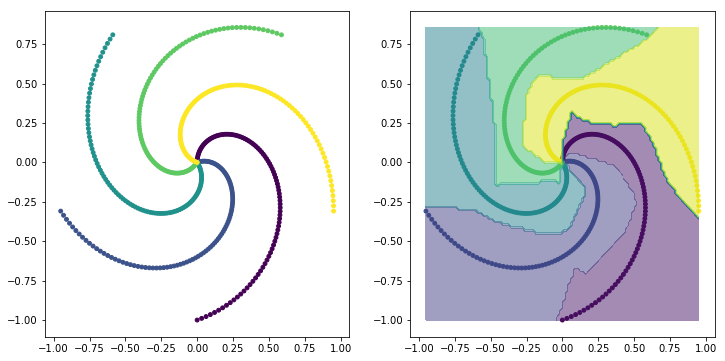

In [72]:
D_in, D_out = x.shape[1], y_onehot.shape[1]

nn = NeuralNetwork(cost_func=softmax_neg_log_likelihood, learning_rate=1e-1)
nn.layers.append(Layer(input_dim=D_in, output_dim=10, activation=relu))
nn.layers.append(Layer(input_dim=10, output_dim=10, activation=relu))
nn.layers.append(Layer(input_dim=10, output_dim=D_out, activation=linear))

nn.fit(x, y_onehot, epochs=10000, verbose=1000)

y_pred = np.argmax(nn.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=nn)

### Make Classification - 4 Classes

In [73]:
x, y = make_classification(n_samples=100, n_classes=4, n_features=2, n_clusters_per_class=1, n_redundant=0, n_repeated=0, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(100, 2) (100, 1)


In [74]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::10])

[[ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]


epoch:    0/10000 data_loss:0.03345983 reg_loss:0.00000000 cost:0.03345983
epoch: 1000/10000 data_loss:0.00353358 reg_loss:0.00000000 cost:0.00353358
epoch: 2000/10000 data_loss:0.00282361 reg_loss:0.00000000 cost:0.00282361
epoch: 3000/10000 data_loss:0.00256992 reg_loss:0.00000000 cost:0.00256992
epoch: 4000/10000 data_loss:0.00241599 reg_loss:0.00000000 cost:0.00241599
epoch: 5000/10000 data_loss:0.00229419 reg_loss:0.00000000 cost:0.00229419
epoch: 6000/10000 data_loss:0.00218661 reg_loss:0.00000000 cost:0.00218661
epoch: 7000/10000 data_loss:0.00204250 reg_loss:0.00000000 cost:0.00204250
epoch: 8000/10000 data_loss:0.00188501 reg_loss:0.00000000 cost:0.00188501
epoch: 9000/10000 data_loss:0.00172613 reg_loss:0.00000000 cost:0.00172613
epoch: 10000/10000 data_loss:0.00160227 reg_loss:0.00000000 cost:0.00160227
Acurácia: 95.00%


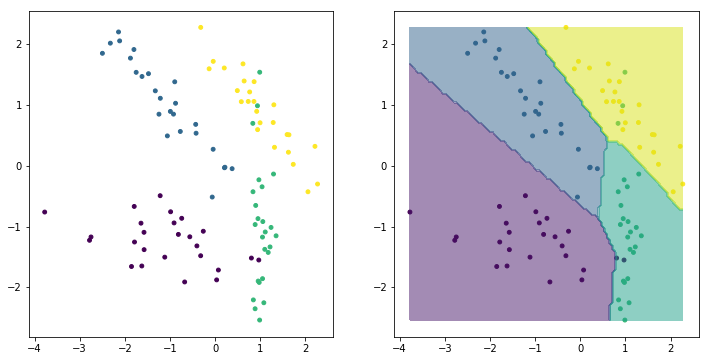

In [75]:
D_in, D_out = x.shape[1], y_onehot.shape[1]

nn = NeuralNetwork(cost_func=softmax_neg_log_likelihood, learning_rate=1e-2)
nn.layers.append(Layer(input_dim=D_in, output_dim=5, activation=relu))
nn.layers.append(Layer(input_dim=5, output_dim=D_out, activation=linear))

nn.fit(x, y_onehot, epochs=10000, verbose=1000)

y_pred = np.argmax(nn.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=nn)

### Iris Dataset

In [76]:
data = load_iris()
x, y = data.data[:, 2:], data.target.reshape(-1,1)

print(data.feature_names)
print(data.target_names)
print(x.shape, y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 2) (150, 1)


In [77]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::20])

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


epoch:    0/10000 data_loss:0.01193747 reg_loss:0.00000000 cost:0.01193747
epoch: 1000/10000 data_loss:0.00382248 reg_loss:0.00000000 cost:0.00382248
epoch: 2000/10000 data_loss:0.00297651 reg_loss:0.00000000 cost:0.00297651
epoch: 3000/10000 data_loss:0.00236894 reg_loss:0.00000000 cost:0.00236894
epoch: 4000/10000 data_loss:0.00189571 reg_loss:0.00000000 cost:0.00189571
epoch: 5000/10000 data_loss:0.00155812 reg_loss:0.00000000 cost:0.00155812
epoch: 6000/10000 data_loss:0.00131792 reg_loss:0.00000000 cost:0.00131792
epoch: 7000/10000 data_loss:0.00115116 reg_loss:0.00000000 cost:0.00115116
epoch: 8000/10000 data_loss:0.00103668 reg_loss:0.00000000 cost:0.00103668
epoch: 9000/10000 data_loss:0.00095684 reg_loss:0.00000000 cost:0.00095684
epoch: 10000/10000 data_loss:0.00089460 reg_loss:0.00000000 cost:0.00089460
Acurácia: 96.00%


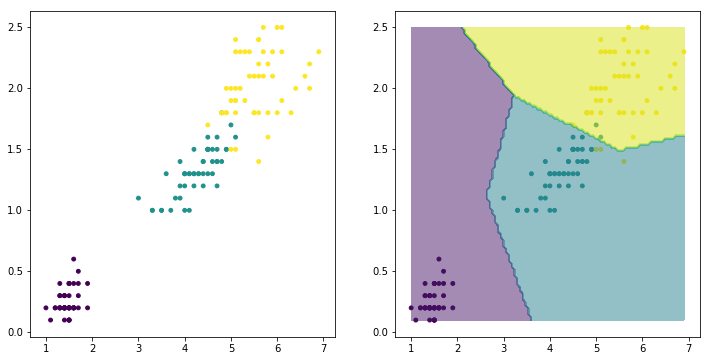

In [79]:
D_in, D_out = x.shape[1], y_onehot.shape[1]

nn = NeuralNetwork(cost_func=softmax_neg_log_likelihood, learning_rate=1e-2)
nn.layers.append(Layer(input_dim=D_in, output_dim=2, activation=relu))
nn.layers.append(Layer(input_dim=2, output_dim=D_out, activation=linear))

nn.fit(x, y_onehot, epochs=10000, verbose=1000)

y_pred = np.argmax(nn.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=nn)

# Referências

- [Tensorflow Playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.94880&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

- [Implementing Neural Network L1 Regularization](https://jamesmccaffrey.wordpress.com/2017/06/27/implementing-neural-network-l1-regularization/)

- [Linear Classification](http://cs231n.github.io/linear-classify/)

__TODO__:
- evitar overflow das funções de ativação
- mini-batch SGD
- dropout
- early_stopping

```py
def stablesoftmax(x):
    """Compute the softmax of vector x in a numerically stable way."""
    shiftx = x - np.max(x)
    exps = np.exp(shiftx)
    return exps / np.sum(exps)
```

__NOTAS__:

__Inicialização dos pesos__:
- mostrar a documentação das funções np.random.rand e np.random.randn para mostrar como gerar distribuições na faixa [-limit, limit] e com média zero e certo desvio-padrão.
- mostrar que os métodos de inicialização de pesos ones e random_uniform podem não ser adequados para alguns problemas, como o do espiral binário.

__Regularização__:
- mostrar que a regularização dos pesos nem sempre ajuda. Em alguns casos, como o espiral multiclasse, temos que definir a reg_strength muito pequena. Isto é, estamos dizendo que o valores dos pesos não podem influenciar no custo. Em outras palavras, isso é a mesma coisa que "desligar" a regularização.